In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from scipy.signal import savgol_filter

# %matplotlib widget

In [2]:
def LDAP_to_time(timestamp):

    value = datetime.datetime(1601, 1, 1) + datetime.timedelta(seconds=timestamp/10000000)

    # return (value.strftime('%Y-%m-%d %H:%M:%S.%f'))
    # print(type(value))
    return value


def modifyTimestamps(df):

    df = df.dropna()
    df = df.drop(df.filter(regex='Name..').columns, axis=1)
    df = df.rename(columns={"Name": "Time"})
    df['Time'] = df['Time'].map(lambda x: LDAP_to_time(x))

    return df


def plotSimulation(df, timeStart=None, timeEnd=None):

    if timeStart == None:   timeStart = df.iloc[0]['Time']
    if timeEnd == None:     timeEnd = df.iloc[-1]['Time']
    print(f'Plotting from "{timeStart}" to "{timeEnd}"')
        

    U1 = df[(df['Time'] >= timeStart) & (df['Time'] <= timeEnd)]['U_L1real']
    U1 = savgol_filter(x=U1, window_length=10, polyorder=5)

    I1 = df[(df['Time'] >= timeStart) & (df['Time'] <= timeEnd)]['I_L1real']
    I1 = savgol_filter(x=I1, window_length=10, polyorder=5)

    time = df[(df['Time'] >= timeStart) & (df['Time'] <= timeEnd)]['Time']


    fig = plt.figure(figsize=(16, 8))
    plt.plot(time, U1, label='Voltage', c='orange')
    plt.plot(time, I1, label='Current', c='k')

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S.%f'))
    plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=10))
    plt.gcf().autofmt_xdate()
    plt.legend()
    plt.show()

Plotting from "2024-02-23 11:43:8.7" to "2024-02-23 11:43:8.9"


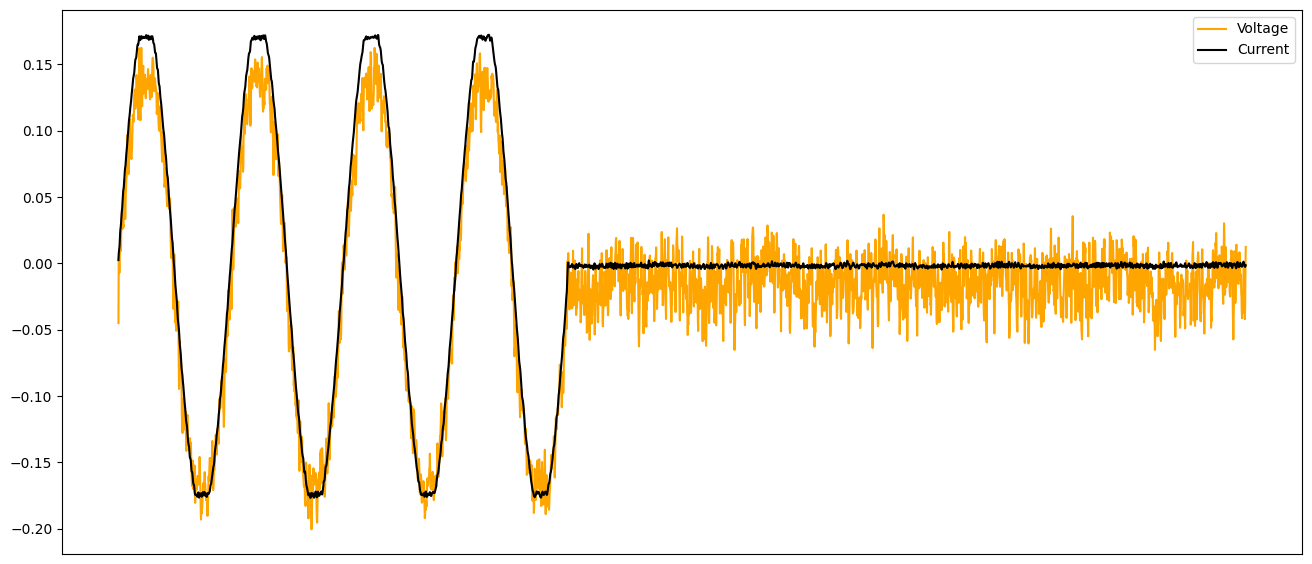

In [3]:
powerFailureDf = pd.read_csv('Power Anomalies Simulations Data/01_Power_failure_10sec.csv', sep=';')
powerFailureDf = modifyTimestamps(df=powerFailureDf)

plotSimulation(df=powerFailureDf, timeStart='2024-02-23 11:43:8.7', timeEnd='2024-02-23 11:43:8.9')

Plotting from "2024-02-23 11:50:08.257000" to "2024-02-23 11:50:08.4"


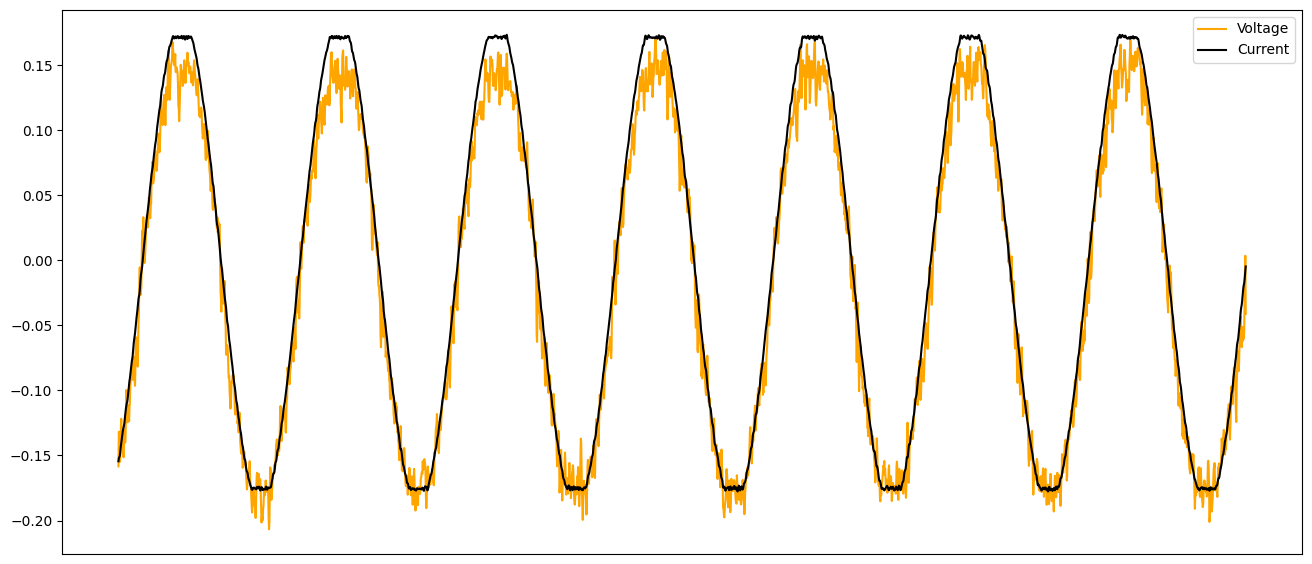

In [4]:
powerSagDf = pd.read_csv('Power Anomalies Simulations Data/02_Power_sag_5sec.csv', sep=';')
powerSagDf = modifyTimestamps(df=powerSagDf)

plotSimulation(df=powerSagDf, timeEnd='2024-02-23 11:50:08.4')

Plotting from "2024-02-23 11:56:02.85" to "2024-02-23 11:56:03.15"


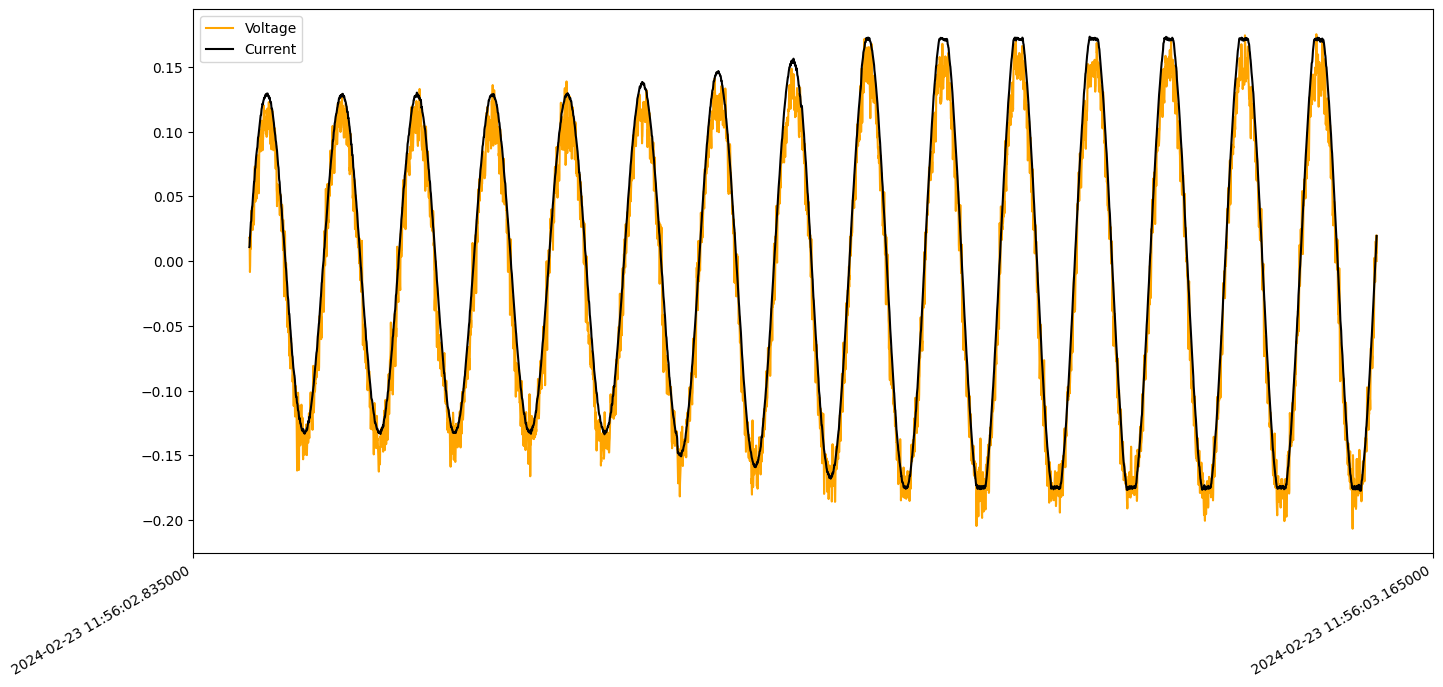

In [5]:
powerSpikeDf = pd.read_csv('Power Anomalies Simulations Data/03_Power_spike_5sec.csv', sep=';')
powerSpikeDf = modifyTimestamps(df=powerSpikeDf)

plotSimulation(df=powerSpikeDf, timeStart='2024-02-23 11:56:02.85', timeEnd='2024-02-23 11:56:03.15')

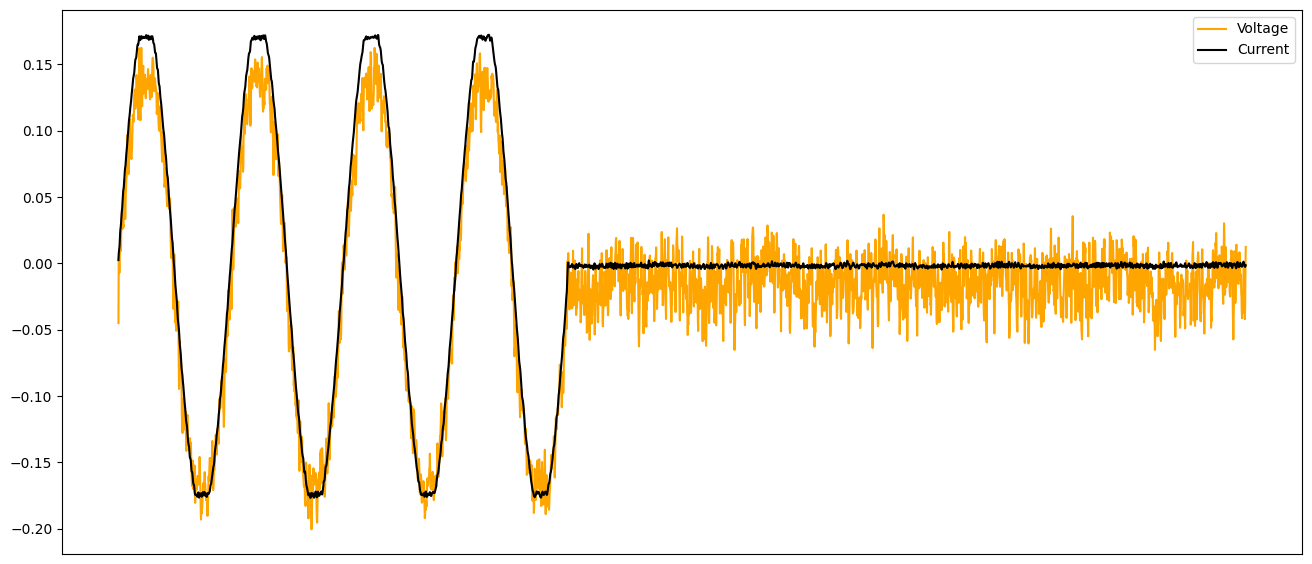

In [6]:
time_start = '2024-02-23 11:43:8.7'
time_end = '2024-02-23 11:43:8.9'

U1 = powerFailureDf[(powerFailureDf['Time'] >= time_start) & (powerFailureDf['Time'] <= time_end)]['U_L1real']
U1 = savgol_filter(x=U1, window_length=10, polyorder=5)

I1 = powerFailureDf[(powerFailureDf['Time'] >= time_start) & (powerFailureDf['Time'] <= time_end)]['I_L1real']
I1 = savgol_filter(x=I1, window_length=10, polyorder=5)

time = powerFailureDf[(powerFailureDf['Time'] >= time_start) & (powerFailureDf['Time'] <= time_end)]['Time']

# U1 = np.array(powerFailureDf['U_L1real'])
# I1 = np.array(powerFailureDf['I_L1real'])[:]
# time = np.array(powerFailureDf['Time'])[459860:469860]

fig = plt.figure(figsize=(16, 8))
plt.plot(time, U1, label='Voltage', c='orange')
plt.plot(time, I1, label='Current', c='k')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S.%f'))
plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=10))
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()

In [7]:
powerSagDf

,Time,I_L1real,U_L1real
0,2024-02-23 11:50:08.257000,-0.154560,-0.1575
1,2024-02-23 11:50:08.257050,-0.151872,-0.1350
2,2024-02-23 11:50:08.257099,-0.151200,-0.1350
3,2024-02-23 11:50:08.257151,-0.151872,-0.1350
4,2024-02-23 11:50:08.257200,-0.148512,-0.1800
...,...,...,...
907556,2024-02-23 11:50:53.634800,-0.176736,-0.1800
907557,2024-02-23 11:50:53.634850,-0.175392,-0.2250
907558,2024-02-23 11:50:53.634899,-0.174048,-0.1800
907559,2024-02-23 11:50:53.634951,-0.175392,-0.2025


In [8]:
first_timestamp = powerFailureDf['Time'].iloc[-1]
first_timestamp

Timestamp('2024-02-23 11:43:36.807501')

In [9]:
powerFailureDf[powerFailureDf['Time'] == powerFailureDf.iloc[-1]['Time']]

,Time,I_L1real,U_L1real
1006010,2024-02-23 11:43:36.807501,0.015456,0.0
